In [1]:
import pandas as pd
import numpy as np

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
from nltk.util import ngrams
from nltk.probability import FreqDist

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix
from scipy import stats

In [5]:
import re
import csv

In [6]:
import csv

# Open the text file and the CSV file
with open('test.ft.txt', 'r') as txt_file, open('test.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)  # Create a CSV writer object
    csv_writer.writerow(["title", "review","label"])
    for line in txt_file:
        review_data = line.split(sep=" ", maxsplit=1)
        labelR = review_data[0] 
        label = int(labelR.split('__')[-1])
        review_data = review_data[1].split(":", maxsplit=1)
        title = review_data[0] 
        review = review_data[1] 

        csv_writer.writerow([title, review, label])


In [7]:
with open('train.ft.txt', 'r') as txt_file, open('train.csv', 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)  # Create a CSV writer object
    csv_writer.writerow(["title", "review", "label"])
    for line in txt_file:
        review_data = line.split(sep=" ", maxsplit=1)
        labelR = review_data[0] 
        label = int(labelR.split('__')[-1])
        review_data = review_data[1].split(":", maxsplit=1)
        title = review_data[0] 
        review = review_data[1] 

        csv_writer.writerow([title, review, label])

In [9]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [10]:
train_df.head()


,title,review,label
0,Stuning even for the non-gamer,This sound track was beautiful! It paints the...,2
1,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this...,2
2,Amazing!,This soundtrack is my favorite music of all t...,2
3,Excellent Soundtrack,I truly like this soundtrack and I enjoy vide...,2
4,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divin...",2


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600000 entries, 0 to 3599999
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   title   object
 1   review  object
 2   label   int64 
dtypes: int64(1), object(2)
memory usage: 82.4+ MB


In [12]:
# Analyze Reviews
totalTrainData = len(train_df)
totalTestData = len(test_df)
print("Total Train Data: ", totalTrainData)
print("Total Test Data: ", totalTestData)

Total Train Data:  3600000
Total Test Data:  400000


In [13]:
positive = len(train_df[train_df['label'] == 2])
negative = len(train_df[train_df['label'] == 1])

print(positive)
print(negative)
print(positive+negative)

1800000
1800000
3600000


In [14]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(train_df['review'])
y = train_df['label']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [16]:
y_pred = model.predict(X_test)
classification_metrics = classification_report(y_test, y_pred, output_dict=True)

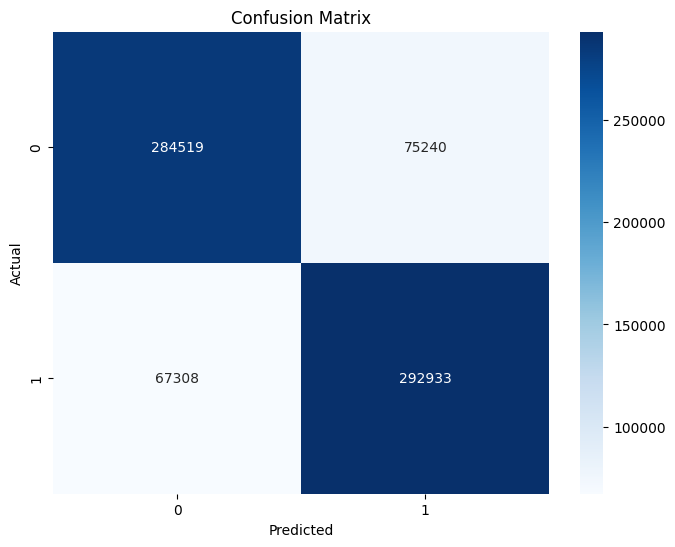

In [17]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [18]:
feature_names = vectorizer.get_feature_names_out()
pos_features = sorted(zip(model.feature_log_prob_[1], feature_names))[-10:]
neg_features = sorted(zip(model.feature_log_prob_[0], feature_names))[-10:]
print(pos_features)
print(neg_features)

[(np.float64(-5.131254103071859), 'really'), (np.float64(-5.117801287103834), 'best'), (np.float64(-5.114941629737004), 'movie'), (np.float64(-5.017331264551185), 'just'), (np.float64(-4.873880632554535), 'love'), (np.float64(-4.852043266627094), 'read'), (np.float64(-4.833695243852031), 'like'), (np.float64(-4.693915658318826), 'good'), (np.float64(-4.3936593819165335), 'great'), (np.float64(-4.16417915104897), 'book')]
[(np.float64(-5.24744208766659), 'read'), (np.float64(-5.188546333503547), 'money'), (np.float64(-5.132146339375661), 'product'), (np.float64(-5.1142546721463855), 'time'), (np.float64(-5.073322178051974), 'good'), (np.float64(-5.0474233730365015), 'movie'), (np.float64(-5.0461459383387375), 'don'), (np.float64(-4.8117581363962625), 'like'), (np.float64(-4.802726779900668), 'just'), (np.float64(-4.297426956257516), 'book')]


In [19]:
#Model Performance:
accuracy = classification_metrics['accuracy']
positivef1 = classification_metrics['2']['f1-score']
negativef1 = classification_metrics['1']['f1-score']
print("Model Accuracy is: " , accuracy)
print("Model F1 Score is: ", positivef1)
print("Model F1 Score is: ",negativef1)

Model Accuracy is:  0.8020166666666667
Model F1 Score is:  0.8043035965810652
Model F1 Score is:  0.7996756541022448


In [20]:
model2 = ComplementNB()
model2.fit(X_train, y_train)

ComplementNB()

In [24]:
y_pred = model2.predict(X_test)
classification_metrics = classification_report(y_test, y_pred, output_dict=True)

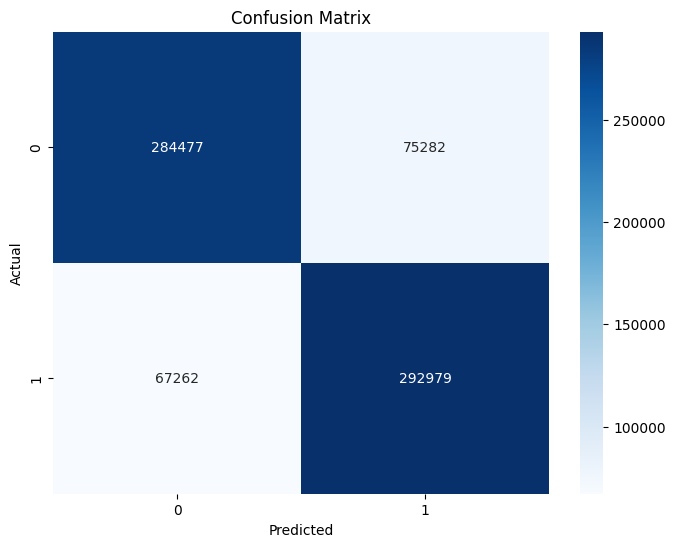

In [25]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [27]:
feature_names = vectorizer.get_feature_names_out()
pos_features = sorted(zip(model.feature_log_prob_[1], feature_names))[-10:]
neg_features = sorted(zip(model.feature_log_prob_[0], feature_names))[-10:]
print(pos_features)
print(neg_features)

[(np.float64(-5.131254103071859), 'really'), (np.float64(-5.117801287103834), 'best'), (np.float64(-5.114941629737004), 'movie'), (np.float64(-5.017331264551185), 'just'), (np.float64(-4.873880632554535), 'love'), (np.float64(-4.852043266627094), 'read'), (np.float64(-4.833695243852031), 'like'), (np.float64(-4.693915658318826), 'good'), (np.float64(-4.3936593819165335), 'great'), (np.float64(-4.16417915104897), 'book')]
[(np.float64(-5.24744208766659), 'read'), (np.float64(-5.188546333503547), 'money'), (np.float64(-5.132146339375661), 'product'), (np.float64(-5.1142546721463855), 'time'), (np.float64(-5.073322178051974), 'good'), (np.float64(-5.0474233730365015), 'movie'), (np.float64(-5.0461459383387375), 'don'), (np.float64(-4.8117581363962625), 'like'), (np.float64(-4.802726779900668), 'just'), (np.float64(-4.297426956257516), 'book')]


In [28]:
accuracy = classification_metrics['accuracy']
positivef1 = classification_metrics['2']['f1-score']
negativef1 = classification_metrics['1']['f1-score']
print("Model Accuracy is: " , accuracy)
print("Model F1 Score is: ", positivef1)
print("Model F1 Score is: ",negativef1)

Model Accuracy is:  0.8020222222222222
Model F1 Score is:  0.8043327266088494
Model F1 Score is:  0.799656499385803
